In [20]:
#modules to be imported
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [21]:
#function to plot the evaluation metrics
#plots confusion matrix,precision, recall and Fscore
def confusion_matrix_rep(y_test,y_pred,class_names,model):
    print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))
    print("precision:",metrics.precision_score(y_test, y_pred,average='macro'))
    cm=confusion_matrix(y_test, y_pred, labels=class_names)
    print("recall:",metrics.recall_score(y_test, y_pred,average='macro'))
    cm=confusion_matrix(y_test, y_pred, labels=class_names)
    print("confusion matrix:\n\n" ,cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    plt.title('Confusion matrix for '+model+" model", y=-0.5)
    fmt = 'd'

    # write the number of predictions in each bucket
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

    # if background is dark, use a white number, and vice-versa
        plt.text(j, i, format(cm[i, j], fmt),
         horizontalalignment="center",
         color="white" if cm[i, j] > thresh else "black")
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    ax.tick_params(axis='x', rotation=90)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [22]:
#reading cleaned, preprocessed data 
processeddata=pd.read_csv(r'C:\\Users\\diyas\\Desktop\\SEM5\\Data_Analytics\\Project\\preprocessed_wosq.csv', index_col='Id')

In [23]:
#data balancing(upsampling)
class_names=processeddata.Target.unique()
class_names=list(class_names)
col=list(processeddata.columns)
data_notnum = list(processeddata.select_dtypes(exclude=[np.number]).columns)
col=list(filter(lambda a: a not in data_notnum, col))
col.pop(-1)
x=processeddata[col]
y=processeddata.Target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=1)
train = pd.concat([x_train, y_train], axis=1)
#Seperating the majority and minority classes
#in this case the majority class is 4 (non vulnerable households)
majority=train[train.Target==4]
minority1=train[train.Target==1]
minority2=train[train.Target==2]
minority3=train[train.Target==3]
minority_upsampled1=resample(minority1, replace=True, n_samples=len(majority), random_state=1)
minority_upsampled2=resample(minority2, replace=True, n_samples=len(majority), random_state=1)
minority_upsampled3=resample(minority3, replace=True, n_samples=len(majority), random_state=1)
upsampled=pd.concat([majority,minority_upsampled1,minority_upsampled2,minority_upsampled3])

In [24]:
#Preparing and spliting the dataset into test and train using the upsampled data
y=upsampled.Target
x=upsampled.drop("Target",axis=1)
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

F1: 0.5324818317358614
precision: 0.5326489874146922
recall: 0.5431507385280191
confusion matrix:

 [[1061  119  193  101]
 [ 227  544  291  365]
 [ 407  249  576  250]
 [  95  209  145  967]]


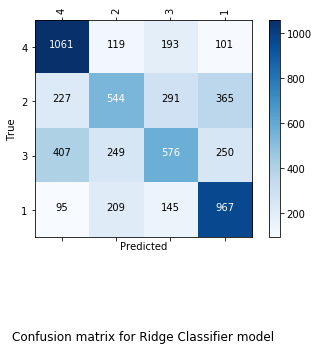

In [25]:
#model 1
#Ridge classifier for dataset 
clf_Ridge = RidgeClassifier()
#model fitting
clf_Ridge = clf_Ridge.fit(X_train,y_train)
#testing
y_pred_Ridge = clf_Ridge.predict(X_test)
confusion_matrix_rep(y_test,y_pred_Ridge,class_names,"Ridge Classifier")

F1: 0.9618591960953585
precision: 0.9630674758415405
recall: 0.9625839306023415
confusion matrix:

 [[1294   67   93   20]
 [  12 1408    5    2]
 [  12    7 1463    0]
 [   2    0    0 1414]]


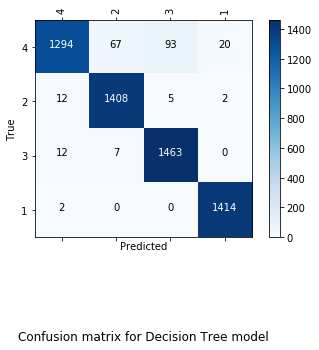

In [26]:
#model 2
#Decision Trees
clf_DT = DecisionTreeClassifier()
#model fitting
clf_DT = clf_DT.fit(X_train,y_train)
y_pred_DT = clf_DT.predict(X_test)
confusion_matrix_rep(y_test,y_pred_DT,class_names,"Decision Tree")

Confusion matrix
F1: 0.9862202897308333
precision: 0.9861981788605484
recall: 0.9863010971529701
confusion matrix:

 [[1425   21   17   11]
 [  19 1405    2    1]
 [   2    1 1475    4]
 [   2    0    0 1414]]


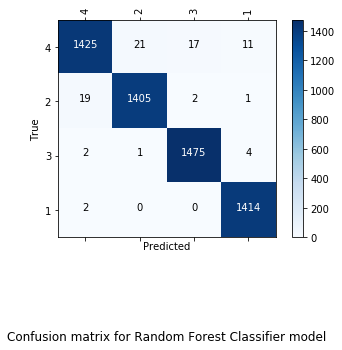

In [27]:
#Model 3
#Random Forest Classifier

#plotting a graph to find optimum value for number of decisions(n_estimators =?) trees to be used
'''l=[]
for i in range(1,150):
    regressor = RandomForestClassifier(n_estimators = i, random_state = 0)
    regressor.fit(x_train, y_train)  
    y_pred= regressor.predict(x_test)
    l.append(accuracy_score(y_test, y_pred))
plt.plot(l)
#can be observed that n_estimators=50 gives approximately highest accuracy score     
'''

# create classifier object with n_estimators = 50
# fit the model with x and y data 
regressor = RandomForestClassifier(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)  
y_pred= regressor.predict(X_test)

#printing confusion matrix
print('Confusion matrix')
confusion_matrix_rep(y_test,y_pred,class_names,"Random Forest Classifier")

Confusion matrix
F1: 0.734944216119008
precision: 0.7354698106108316
recall: 0.7362363146618175
confusion matrix:

 [[1125  118  163   68]
 [ 137  922  182  186]
 [ 206  147 1046   83]
 [  79   83   79 1175]]


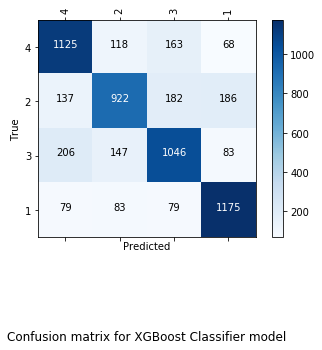

In [28]:
#Model 3
#XGBoost

model = XGBClassifier()
model.fit(X_train, y_train)
#predict using the model
y_pred = model.predict(X_test)
#printing confusion matrix
print('Confusion matrix')
confusion_matrix_rep(y_test,y_pred,class_names,"XGBoost Classifier")